In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [4]:
df = pd.read_csv('diabetes.csv')

In [5]:
# 2. Separate features and target variable
# Split the data into features (X) and target (y). 
# Here, Outcome is the target variable (1 for diabetic, 0 for not diabetic).

X = df.drop(columns=['Outcome'])  # Features
y = df['Outcome']  # Target variable (1 = Diabetic, 0 = Not Diabetic)

In [6]:
# 3. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# 4. normalise the dataset
# use StandardScalar to normalize the feature values for both the training and testing data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [11]:
# 5. Initialize and Train the K-Nearest Neighbors Model
# Instantiate the KNeighborsClassifier with n_neighbors=5 and fit it on the training data.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
# 6. Predict on the test data
y_pred = knn.predict(X_test)

In [13]:
# 7. Compute evaluation metrics

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Error Rate
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Confusion Matrix:
 [[83 16]
 [31 24]]
Accuracy: 0.6948051948051948
Error Rate: 0.30519480519480524
Precision: 0.6
Recall: 0.43636363636363634


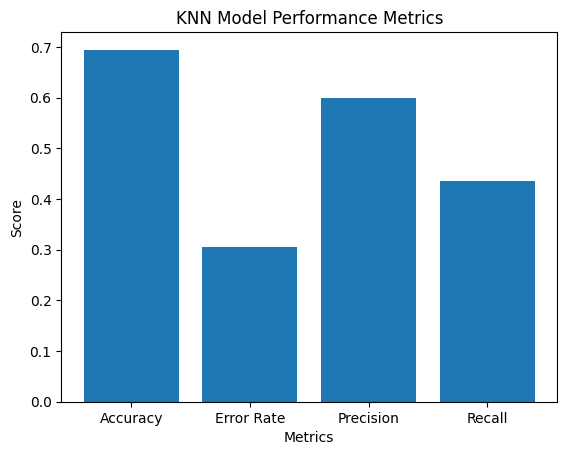

In [17]:
import matplotlib.pyplot as plt

# Define metric names and values
metrics = ['Accuracy', 'Error Rate', 'Precision', 'Recall']
values = [accuracy, error_rate, precision, recall]

# Create a basic bar chart
plt.bar(metrics, values)
plt.title("KNN Model Performance Metrics")
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.show()


C:\Users\adity\AppData\Local\Temp\ipykernel_5524\2483884814.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette="viridis")


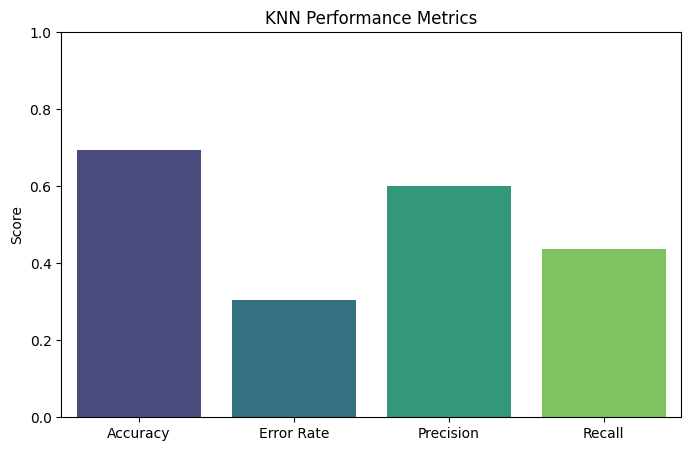

In [20]:
# uparka and yae wala same he hai... bus yae thoda accha dikhta hai
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=values, palette="viridis")
plt.ylim(0, 1)
plt.title("KNN Performance Metrics")
plt.ylabel("Score")
plt.show()

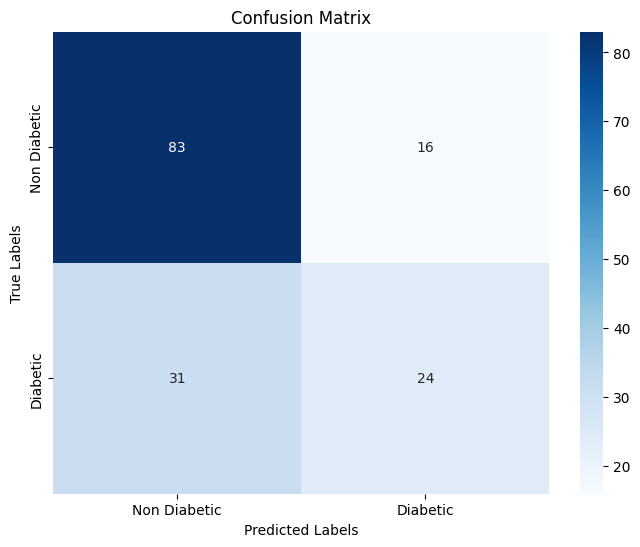

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non Diabetic', 'Diabetic'], yticklabels=['Non Diabetic', 'Diabetic'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()